In [2]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
mnist = fetch_openml("mnist_784",version=1,parser="auto")

In [9]:
X,Y = mnist["data"], mnist["target"]
X_df = X
Y = Y.astype(np.uint8)
X = X.to_numpy()

# X --> Numpy image value for the numbers. 
# Y --> Classification output for all the numbers

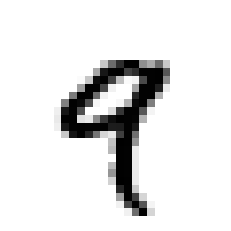

In [33]:
sample = 4
some_digit = X[sample]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

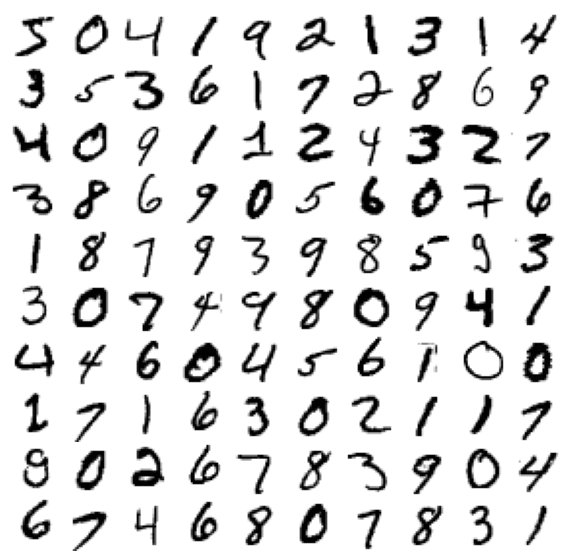

In [5]:
# building a image chart of mnist numbers 
plt.figure(figsize=(10,10))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10,10,idx+1)
    # plot images 
    image_data = image_data.reshape(28, 28)
    plt.axis("off")
    plt.imshow(image_data,cmap="binary")
    plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [22]:
# Splitting 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [23]:
y_train5 = (y_train == 5)
y_test5 = (y_test == 5)

In [30]:
# We will use a SGD Classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train5)

SGDClassifier(random_state=42)

In [28]:
sgd_clf.predict([some_digit])

array([False])

In [31]:
# Support vector classifier 
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

9


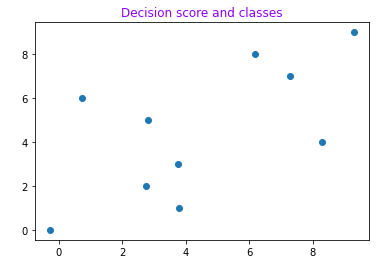

In [77]:
svm.predict([some_digit])

# Decision function with SVM
svm_digit = svm.decision_function([some_digit])
# Get the class label for the max decision function digit. 
print(svm_digit.argmax())
svm_digit = svm_digit.reshape((10,1))
plt.scatter((svm_digit.round(2)),svm.classes_,label="Values",marker="o")
plt.xlabel("Decision score").set_color("white")
plt.ylabel("Classes").set_color("white")
plt.title("Decision score and classes").set_color("#8F00FF")
plt.savefig("svm_digit")
plt.show()

# Multiclass classification
It simply means that we want to have classifiers that can detect multiple classes rather than a single class. 

# Mutlilabel classification
It means that we have different label for the same image. Unlike multiclass we don't define a single data unit as a class but a collection of many possible classes.

In [91]:
from sklearn.neighbors import KNeighborsClassifier
y_train_small = (y_train.astype("str") < '7')
y_train_even = (y_train.astype("uint8") % 2 == 0)
y_multilabel = np.c_[y_train_small, y_train_even]


knn = KNeighborsClassifier()
knn.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [103]:
i = 20
value = y_train[i]
prediction = knn.predict([X_train[i]])[0]

f"prediction for {value}, less than 7 --> {prediction[0]} and even is {prediction[1]}"

'prediction for 4, less than 7 --> True and even is True'